In [20]:
import sqlite3
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext nb_black

<IPython.core.display.Javascript object>

In [21]:

raw_data_dir = Path("../data/raw")
conn = sqlite3.connect(raw_data_dir.joinpath("telco_customer_churn.db"))
# Load the dataset
data = pd.read_sql_query("SELECT * FROM customers", conn)
conn.close()

<IPython.core.display.Javascript object>

In [22]:
# Check the first few rows of the dataset
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

<IPython.core.display.Javascript object>

In [23]:
# Get an overview of the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<IPython.core.display.Javascript object>

In [24]:
# Summary statistics of numerical columns
print(data.describe())


       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


<IPython.core.display.Javascript object>

In [25]:
# Check for missing values
print(data.isnull().sum())


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


<IPython.core.display.Javascript object>

These TotalCharges are already missing the original database.

In [26]:
data.loc[data["TotalCharges"].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


<IPython.core.display.Javascript object>

In [35]:
col

3

<IPython.core.display.Javascript object>

C:\Users\maxime.baelde\AppData\Local\Temp\ipykernel_17428\2817497180.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=30)
C:\Users\maxime.baelde\AppData\Local\Temp\ipykernel_17428\2817497180.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=30)
C:\Users\maxime.baelde\AppData\Local\Temp\ipykernel_17428\2817497180.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=30)
C:\Users\maxime.baelde\AppData\Local\Temp\ipykernel_17428\2817497180.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.s

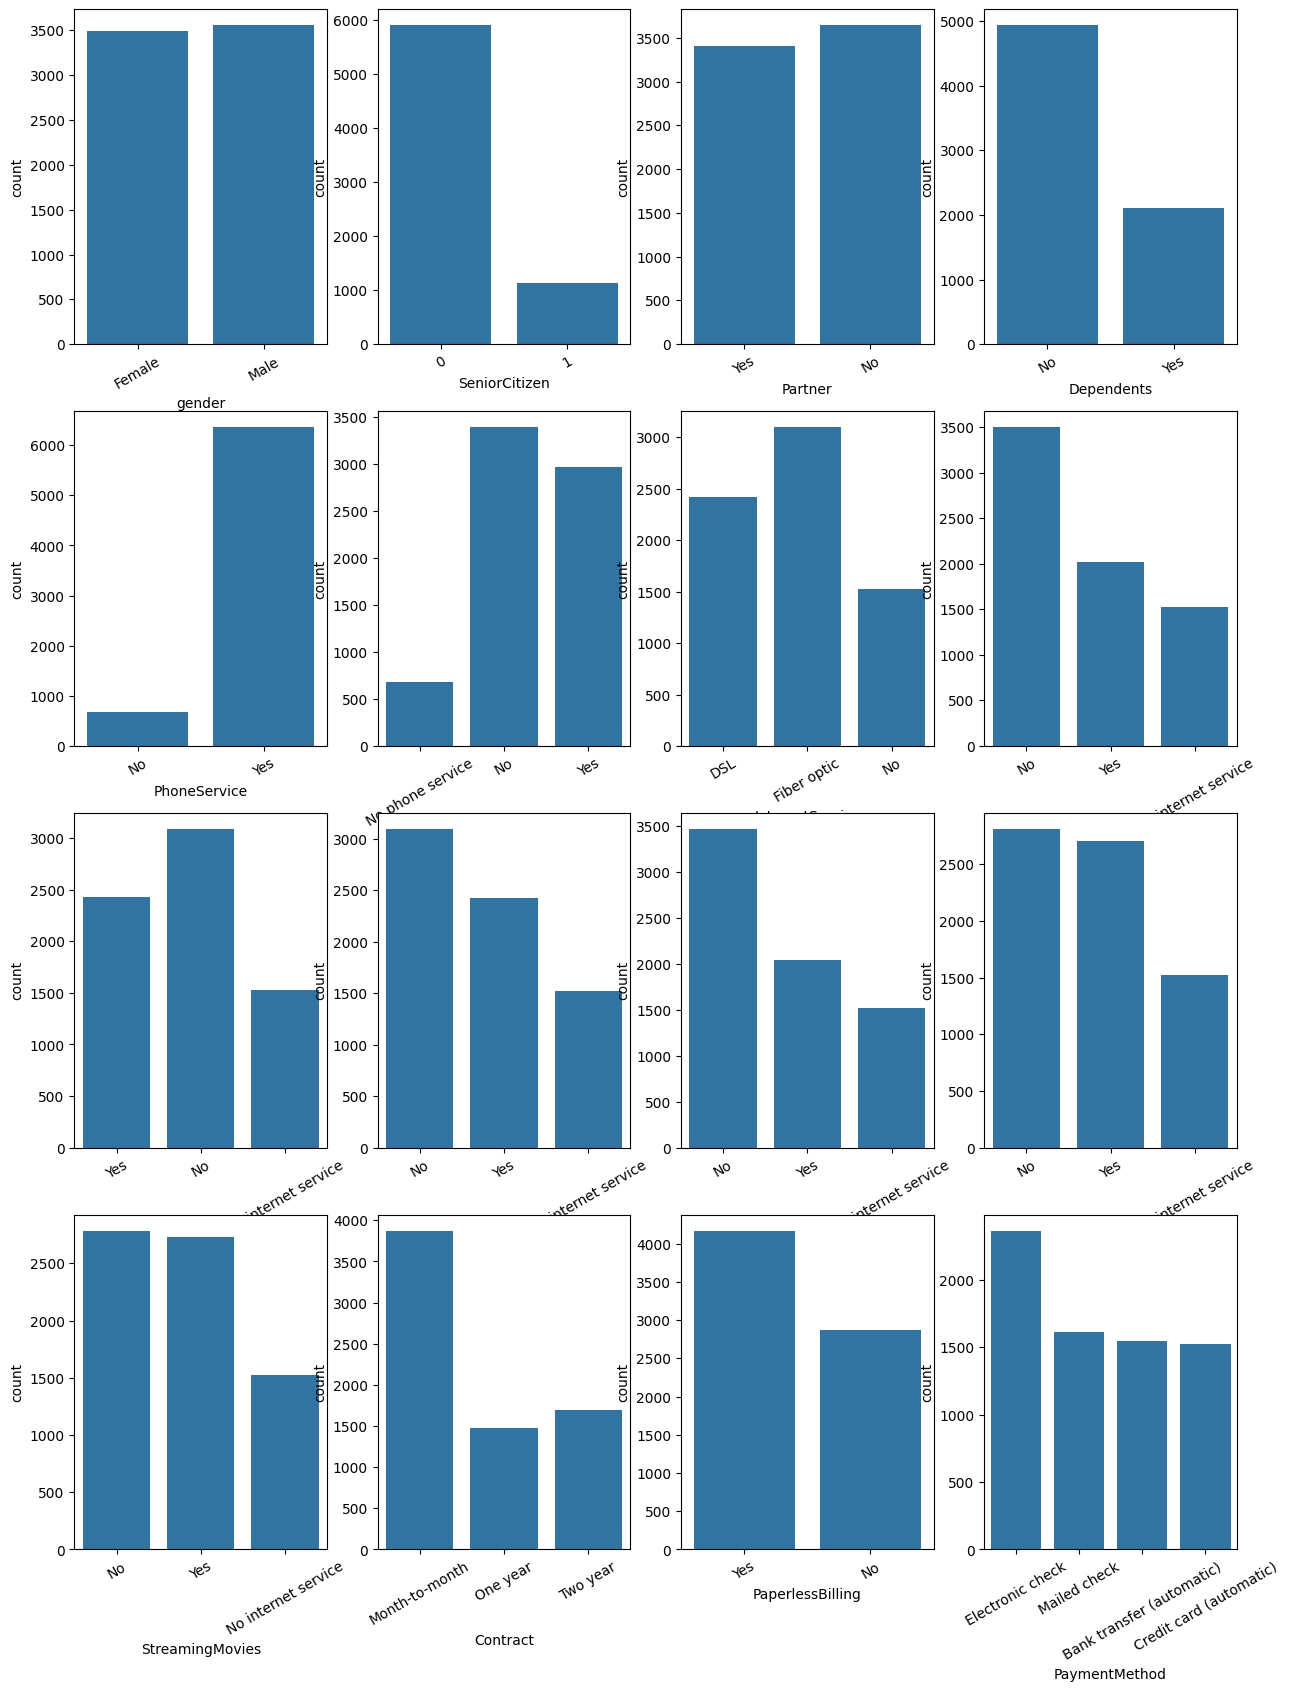

<IPython.core.display.Javascript object>

In [40]:
fig, axes = plt.subplots(4, 4, figsize=(15,20))
for i, c in enumerate(["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod"]):
    row = i // 4
    col = i % 4
    plot = sns.countplot(x=c, data=data, ax=axes[row,col])
    plot.set_xticklabels(plot.get_xticklabels(), rotation=30)
    #plt.title('Churn Distribution')
    #plt.show()

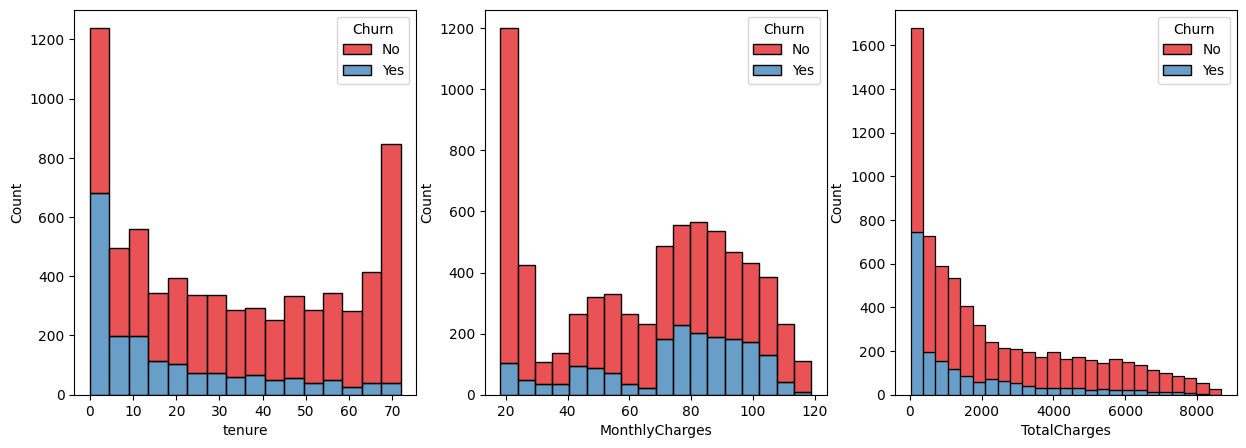

<IPython.core.display.Javascript object>

In [50]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
for i, c in enumerate(["tenure", "MonthlyCharges", "TotalCharges"]):
    sns.histplot(x=c, data=data, ax=axes[i], hue='Churn', multiple='stack', palette='Set1')

The churn distribution is clearly imbalanced with a majority of no churn.

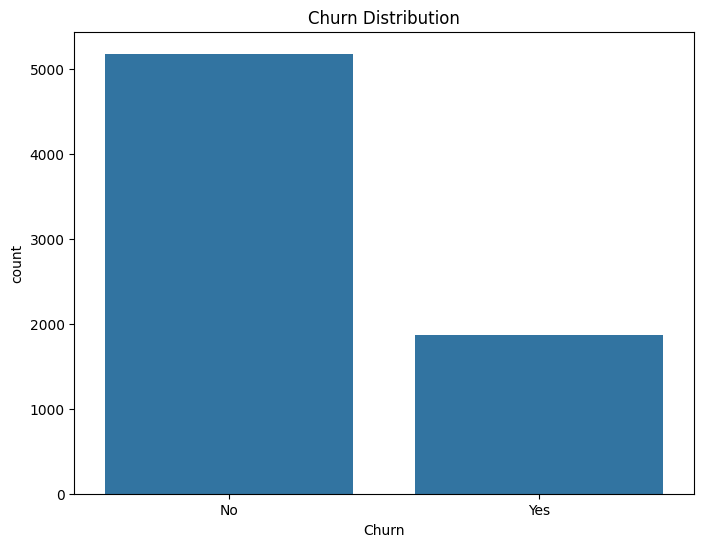

In [8]:
# Visualize churn distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()


It seems that the month to month contract type leads to the most customer churn. This makes sense since a ony or two years make it more difficult to leave the company. 

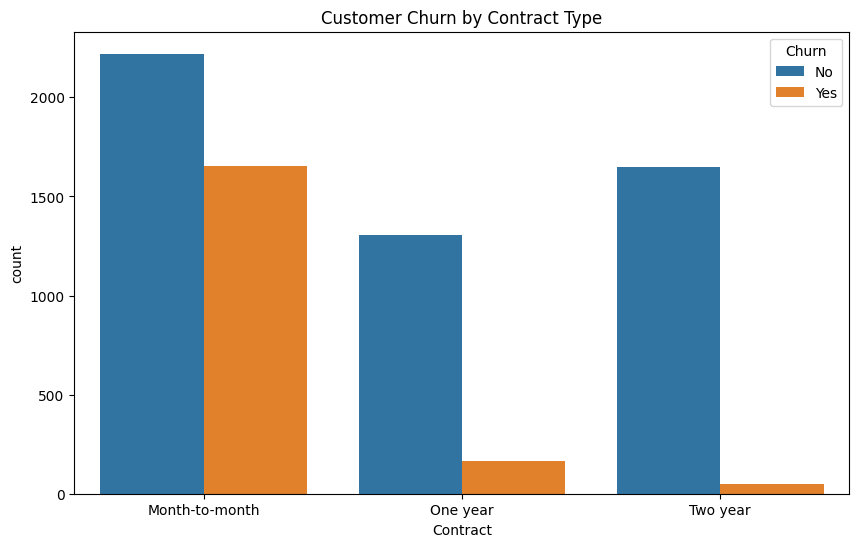

In [9]:

# Visualize churn by contract type
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Customer Churn by Contract Type')
plt.show()


The electronic check payment method seems to lead to more customer churn than the other methods.

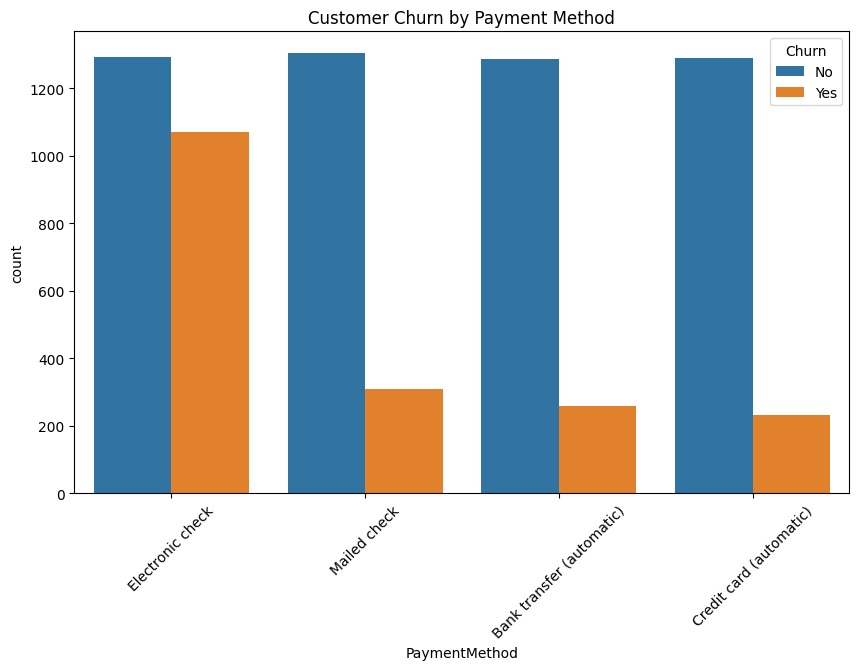

In [10]:
# Visualize churn by payment method
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=data)
plt.title('Customer Churn by Payment Method')
plt.xticks(rotation=45)
plt.show()


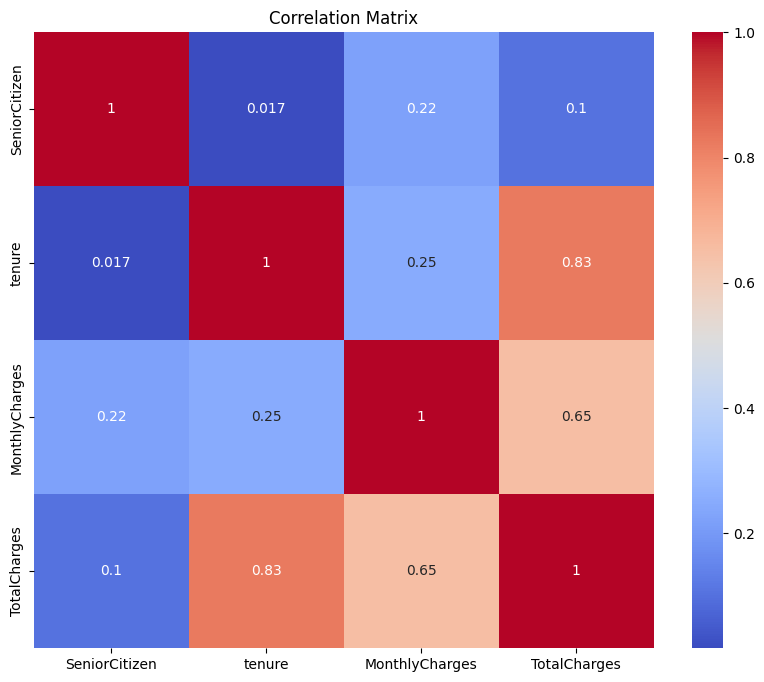

In [17]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [12]:

# Select relevant features for modeling
relevant_features = ['tenure', 'Contract', 'MonthlyCharges', 'TotalCharges', 'PaperlessBilling', 'PaymentMethod', 'Churn']
selected_data = data[relevant_features]

# Convert categorical features to numerical using one-hot encoding
selected_data = pd.get_dummies(selected_data, columns=['Contract', 'PaymentMethod', 'PaperlessBilling'], drop_first=True)

# Examine the resulting dataset
print(selected_data.head())


   tenure  MonthlyCharges  TotalCharges Churn  Contract_One year  \
0       1           29.85         29.85    No                  0   
1      34           56.95       1889.50    No                  1   
2       2           53.85        108.15   Yes                  0   
3      45           42.30       1840.75    No                  1   
4       2           70.70        151.65   Yes                  0   

   Contract_Two year  PaymentMethod_Credit card (automatic)  \
0                  0                                      0   
1                  0                                      0   
2                  0                                      0   
3                  0                                      0   
4                  0                                      0   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
0                               1                           0   
1                               0                           1   
2                